# Lab 5: Lexical semantics

Authors: Edison Jair Bejarano Sepulveda - Roberto Ariosa


## Statement:

- Given the following (lemma, category) pairs:

 * ('the','DT'), ('man','NN'), ('swim','VB'), ('with', 'PR'), ('a', 'DT'),
('girl','NN'), ('and', 'CC'), ('a', 'DT'), ('boy', 'NN'), ('whilst', 'PR'),
('the', 'DT'), ('woman', 'NN'), ('walk', 'VB')


1. For each pair, when possible, print their most frequent WordNet synset, their corresponding least common subsumer (LCS) and their similarity value, using the following functions:

  - Path Similarity

  - Leacock-Chodorow Similarity

 - Wu-Palmer Similarity

  - Lin Similarity

2. Normalize similarity values when necessary. What similarity seems better?


## 0. Libraries and initial lemmas

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic

nltk.download('wordnet')
nltk.download('wordnet_ic')
nltk.download('omw-1.4')

words = [
    ('the','DT'),
    ('man','NN'),
    ('swim','VB'),
    ('with', 'PR'),
    ('a', 'DT'),
    ('girl','NN'),
    ('and', 'CC'),
    ('a', 'DT'),
    ('boy', 'NN'),
    ('whilst', 'PR'),
    ('the', 'DT'),
    ('woman', 'NN'),
    ('walk', 'VB')
]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## 1. Most frequent WordNet synset

In [2]:
# Only select the words that are nouns or verbs
valid_words = sorted([ (word, pos) for word, pos in words if pos == 'NN' or pos == 'VB' ], key = lambda w: w[1])

# Initialize
most_frequent_synset_df = pd.DataFrame(columns=['word', 'pos', 'most_frequent_synset'])
synsets = {}

for word, pos in valid_words:
  # Find the most frequent synset
  most_frequent_synset = None
  if pos == 'NN':
    most_frequent_synset = wn.synset(word + '.n.01')
  elif pos == 'VB':
    most_frequent_synset = wn.synset(word + '.v.01')
  else:
    continue

  # Store the WordNet synset for later
  synsets[word] = most_frequent_synset

  # Store the most frequent synset  
  most_frequent_synset_df = most_frequent_synset_df.append({
      'word': word,
      'pos': pos,
      'most_frequent_synset': most_frequent_synset
  }, ignore_index=True)

# Display result
most_frequent_synset_df

,word,pos,most_frequent_synset
0,man,NN,Synset('man.n.01')
1,girl,NN,Synset('girl.n.01')
2,boy,NN,Synset('male_child.n.01')
3,woman,NN,Synset('woman.n.01')
4,swim,VB,Synset('swim.v.01')
5,walk,VB,Synset('walk.v.01')


## 2. Least common subsumer (LCS)

In [3]:
# Initialize
lcs_df = pd.DataFrame(
    columns = [word for word, pos in valid_words],
    index = [word for word, pos in valid_words]
)

for word1, pos1 in valid_words:
  for word2, pos2 in valid_words:
    # WordNet only allows to find a LCS for words with the same pos tag
    if pos1 == pos2:
      lcs_df[word1][word2] = synsets[word1].lowest_common_hypernyms(synsets[word2])

# Display result
lcs_df

,man,girl,boy,woman,swim,walk
man,[Synset('man.n.01')],[Synset('adult.n.01')],[Synset('male.n.02')],[Synset('adult.n.01')],NaN,NaN
girl,[Synset('adult.n.01')],[Synset('girl.n.01')],[Synset('person.n.01')],[Synset('woman.n.01')],NaN,NaN
boy,[Synset('male.n.02')],[Synset('person.n.01')],[Synset('male_child.n.01')],[Synset('person.n.01')],NaN,NaN
woman,[Synset('adult.n.01')],[Synset('woman.n.01')],[Synset('person.n.01')],[Synset('woman.n.01')],NaN,NaN
swim,NaN,NaN,NaN,NaN,[Synset('swim.v.01')],[Synset('travel.v.01')]
walk,NaN,NaN,NaN,NaN,[Synset('travel.v.01')],[Synset('walk.v.01')]


## 3.1 Similarity value: Path similarity

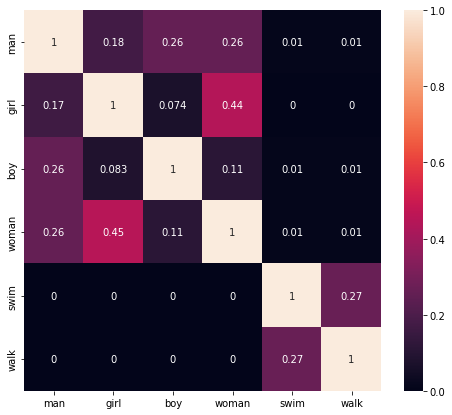

In [4]:
# Initialize
path_similarity_df = pd.DataFrame(
    columns = [word for word, pos in valid_words],
    index = [word for word, pos in valid_words],
    dtype = float
)

# Find path similarity for each pair
for word1, pos1 in valid_words:
  for word2, pos2 in valid_words:
    similarity = synsets[word1].path_similarity(synsets[word2])
    path_similarity_df[word1][word2] = similarity

# Normalize
df_min = path_similarity_df.min()
df_max = path_similarity_df.max()
path_similarity_df = (path_similarity_df - df_min) / (df_max - df_min)

# Plot results
plt.figure(figsize=(8, 7))
sns.heatmap(path_similarity_df, annot=True)
plt.show()

## 3.2 Similarity value: Leacock-Chodorow Similarity

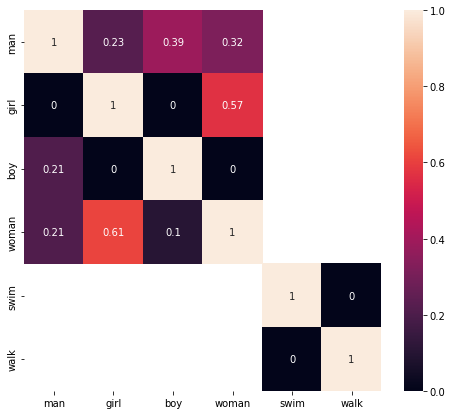

In [5]:
# Initialize
lch_similarity_df = pd.DataFrame(
    columns = [word for word, pos in valid_words],
    index = [word for word, pos in valid_words],
    dtype = float
)

# Find Leacock-Chodorow Similarity for each pair
for word1, pos1 in valid_words:
  for word2, pos2 in valid_words:
    # Only valid for words with the same pos tag
    if pos1 == pos2:
      similarity = synsets[word1].lch_similarity(synsets[word2])
      lch_similarity_df[word1][word2] = similarity

# Normalize
df_min = lch_similarity_df.min()
df_max = lch_similarity_df.max()
lch_similarity_df = (lch_similarity_df - df_min) / (df_max - df_min)

# Plot results
plt.figure(figsize=(8, 7))
sns.heatmap(lch_similarity_df, annot=True)
plt.show()

## 3.3 Similarity value: Wu-Palmer similarity

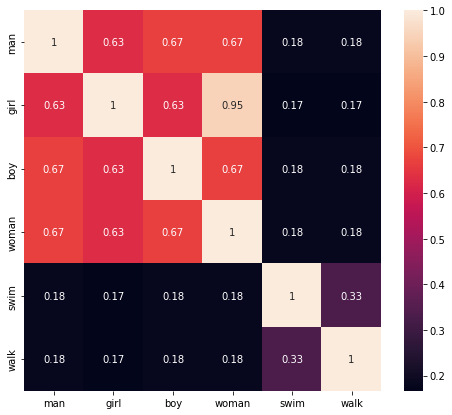

In [6]:
# Initialize
wup_similarity_df = pd.DataFrame(
    columns = [word for word, pos in valid_words],
    index = [word for word, pos in valid_words],
    dtype = float
)

# Find Wu-Palmer similarity for each pair
for word1, pos1 in valid_words:
  for word2, pos2 in valid_words:
    similarity = synsets[word1].wup_similarity(synsets[word2])
    wup_similarity_df[word1][word2] = similarity

# Normalize
#df_min = wup_similarity_df.min()
#df_max = wup_similarity_df.max()
#wup_similarity_df = (wup_similarity_df - df_min) / (df_max - df_min)

# Plot results
plt.figure(figsize=(8, 7))
sns.heatmap(wup_similarity_df, annot=True)
plt.show()

## 3.4 Similarity value: Lin similarity

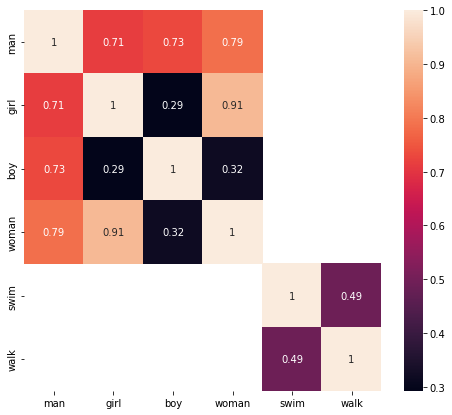

In [7]:
# Initialize
lin_similarity_df = pd.DataFrame(
    columns = [word for word, pos in valid_words],
    index = [word for word, pos in valid_words],
    dtype = float
)

# Get Information Content
brown_ic = wordnet_ic.ic('ic-brown.dat')

# Calculate Lin similarity for each pair
for word1, pos1 in valid_words:
  for word2, pos2 in valid_words:
    # Only valid for words with the same pos tag
    if pos1 == pos2:
      similarity = synsets[word1].lin_similarity(synsets[word2], brown_ic)
      lin_similarity_df[word1][word2] = similarity

# Normalize
#df_min = lin_similarity_df.min()
#df_max = lin_similarity_df.max()
#lin_similarity_df = (lin_similarity_df - df_min) / (df_max - df_min)

# Plot results
plt.figure(figsize=(8, 7))
sns.heatmap(lin_similarity_df, annot=True)
plt.show()

## 4. Conclusions

- What similarity seems better?

Having a look at the results obtained, we can deduce that Lin similarity is the best to use. Lin similarity can differentiate gender much better than other similarities, like Wu Palmer. It also has simmetric results, where in Wu Palmer we can see that the similarity between the woman and girl is not the same as the one between girl and woman.

Other similaries have similar results, but Lin is the most consistent one.